### Carlos' code

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
C:\Users\carli\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline

In [3]:
# matplotlib.__version__

In [4]:
import hvplot.pandas

In [5]:
file_name='house_prices_msa.csv'
csv_file=Path(f"../Data/{file_name}")
house_price_df= pd.read_csv(csv_file)
house_price_df.head(2)

,RegionID,SizeRank,RegionName,RegionType,StateName,1/31/1996,2/29/1996,3/31/1996,4/30/1996,5/31/1996,...,12/31/2019,1/31/2020,2/29/2020,3/31/2020,4/30/2020,5/31/2020,6/30/2020,7/31/2020,8/31/2020,9/30/2020
0,102001,0,United States,Country,NaN,107630.0,107657.0,107707.0,107834.0,107977.0,...,247737,248625,249639,250802,252042,253216,254423,255872,257736,259906
1,394913,1,"New York, NY",Msa,NY,187842.0,187403.0,187125.0,186592.0,186274.0,...,479999,480758,481745,482804,484104,485517,487279,489670,492875,497090


In [6]:
# Cleaning and re arranging data 
house_price_df=house_price_df#(set_index='RegionID')
house_price_df.set_index(house_price_df['RegionName'],inplace=True)
house_price_df=house_price_df.drop(columns=['RegionID','SizeRank', 'RegionName', 'RegionType', 'StateName'])
house_price_df=house_price_df.transpose()
house_price_df.columns.name = None
house_price_df.tail(5)
# region_id_df.plot(legend=False) 

# people_csv.set_index(people_csv['first_name'], inplace=True)
# gold_csv.set_index(pd.to_datetime(gold_csv['Date'], infer_datetime_format=True), inplace=True)

,United States,"New York, NY","Los Angeles-Long Beach-Anaheim, CA","Chicago, IL","Dallas-Fort Worth, TX","Philadelphia, PA","Houston, TX","Washington, DC","Miami-Fort Lauderdale, FL","Atlanta, GA",...,"Winnemucca, NV","Sweetwater, TX","Andrews, TX","Zapata, TX","Vermillion, SD","Lamesa, TX","Craig, CO","Pecos, TX","Vernon, TX","Ketchikan, AK"
5/31/2020,253216.0,485517.0,691229.0,247719.0,264699.0,256799.0,224420.0,441727.0,302132.0,245768.0,...,226697.0,79991.0,170737.0,91481.0,179138.0,76213.0,187109.0,129605.0,69276.0,312216.0
6/30/2020,254423.0,487279.0,692332.0,248421.0,265992.0,258666.0,225165.0,444179.0,303396.0,247242.0,...,227020.0,80081.0,171393.0,91978.0,179052.0,76503.0,187262.0,130574.0,69229.0,312121.0
7/31/2020,255872.0,489670.0,696613.0,249650.0,267485.0,260637.0,226007.0,447399.0,304694.0,248841.0,...,227333.0,80159.0,172116.0,92335.0,178945.0,76738.0,187332.0,131262.0,69236.0,312147.0
8/31/2020,257736.0,492875.0,703740.0,251298.0,269183.0,263126.0,227049.0,451030.0,306533.0,250642.0,...,227223.0,80068.0,172764.0,92363.0,179167.0,76975.0,187393.0,131311.0,69248.0,312419.0
9/30/2020,259906.0,497090.0,711361.0,253512.0,270907.0,265912.0,228576.0,455038.0,308911.0,252586.0,...,226533.0,79985.0,173153.0,92602.0,179547.0,77216.0,187430.0,130703.0,69306.0,312663.0


In [7]:
# Calcuate variables from house database 

# Change in price since February, prior to COVID hit in March
start_date='9/30/2020'
end_date='2/29/2020'
change_since_feb=house_price_df.loc[start_date]/house_price_df.loc[end_date]-1


# sale_stats_df=pd.DataFrame([[change_since_feb,avg_last_12m]],columns=['% Change Since Feb','AVG Last 12M'])
sale_stats_df=pd.DataFrame(change_since_feb,columns=['% Sale Price Change Since Feb'])


# df.index = df["Index Title"]
# Last 12 Months average: to show cost and avoid intra month volatility
avg_last_12m=house_price_df.iloc[-12:,:].mean()
sale_stats_df['Avg Sale Price Last 12M']=avg_last_12m

# Most Recent Data Point
last_price=house_price_df.iloc[-1,:]
sale_stats_df['Sale Price Last']=last_price


# Calculate CAGR: Min post GFC to Most Recent Date
# Add a column with most recent date
# Create a column that i will drop with last_date - used to calculate number of periods
sale_stats_df['last_date']=house_price_df.index[-1]
sale_stats_df['last_date']=pd.to_datetime(sale_stats_df['last_date'], errors='coerce')


#  Found the minimum data point after the GFC for each MSA
# Create a column that i will drop with last_date - used to calculate number of periods
sale_stats_df['gfc_min']=house_price_df.loc['1/31/2008':].idxmin()
sale_stats_df['gfc_min']=pd.to_datetime(sale_stats_df['gfc_min'], errors='coerce')

# Populate the minimum value from series
sale_stats_df['gfc_min_value']=house_price_df.loc['1/31/2008':].min()

# calculate the number of periods
sale_stats_df['months_diff'] = sale_stats_df['last_date'].dt.to_period('M').astype(int)-sale_stats_df['gfc_min'].dt.to_period('M').astype(int)

# Actual CAGR
period=12
# cagr=(house_price_df.loc[date_last]/house_price_df.loc[gfc_min])**(1*period/month_diff)-1
sale_stats_df['Sale Pr CAGR GFC']=(sale_stats_df['Sale Price Last']/sale_stats_df['gfc_min_value'])**(period*1/sale_stats_df['months_diff'])-1


# Calculate Standard Deviation and I annualize
monthly_returns_sales_df=house_price_df.pct_change()
monthly_std_sales_df=monthly_returns_sales_df.std()#* np.sqrt(12)
sale_stats_df['Standard Deviation']=monthly_returns_sales_df.std()* np.sqrt(12)




In [8]:
# D0 this only once
# Create columns with city and state to allow more flexibility when showing data
# sale_stats_df[['City','State']] = sale_stats_df['MSA'].str.split(",", n = 1, expand=True) # Split City from text string
sale_stats_df.reset_index(inplace=True)
# sale_stats_df['index'].name='MSA'
sale_stats_df.rename(columns={'index':'MSA'}, inplace= True)
sale_stats_df[['City','State']] = sale_stats_df['MSA'].str.split(",", n = 1, expand=True) # Split City from text string
sale_stats_df.set_index('MSA',inplace=True)

In [9]:
# re arrange order
sale_stats_df=sale_stats_df[['City','State','% Sale Price Change Since Feb', 'Avg Sale Price Last 12M', 'Sale Price Last', 'Sale Pr CAGR GFC','Standard Deviation']]
sale_stats_df.head(10)

,City,State,% Sale Price Change Since Feb,Avg Sale Price Last 12M,Sale Price Last,Sale Pr CAGR GFC,Standard Deviation
MSA,,,,,,,
United States,United States,None,0.041127,251932.416667,259906.0,0.056108,0.015617
"New York, NY",New York,NY,0.031853,485123.166667,497090.0,0.036593,0.018566
"Los Angeles-Long Beach-Anaheim, CA",Los Angeles-Long Beach-Anaheim,CA,0.045627,686194.416667,711361.0,0.073333,0.031222
"Chicago, IL",Chicago,IL,0.030465,247694.583333,253512.0,0.044707,0.022278
"Dallas-Fort Worth, TX",Dallas-Fort Worth,TX,0.036259,263875.916667,270907.0,0.073495,0.012663
"Philadelphia, PA",Philadelphia,PA,0.048648,256259.250000,265912.0,0.032860,0.016210
"Houston, TX",Houston,TX,0.030610,223546.083333,228576.0,0.054770,0.011377
"Washington, DC",Washington,DC,0.043368,440485.333333,455038.0,0.038523,0.024124
"Miami-Fort Lauderdale, FL",Miami-Fort Lauderdale,FL,0.035651,300640.416667,308911.0,0.078524,0.034969


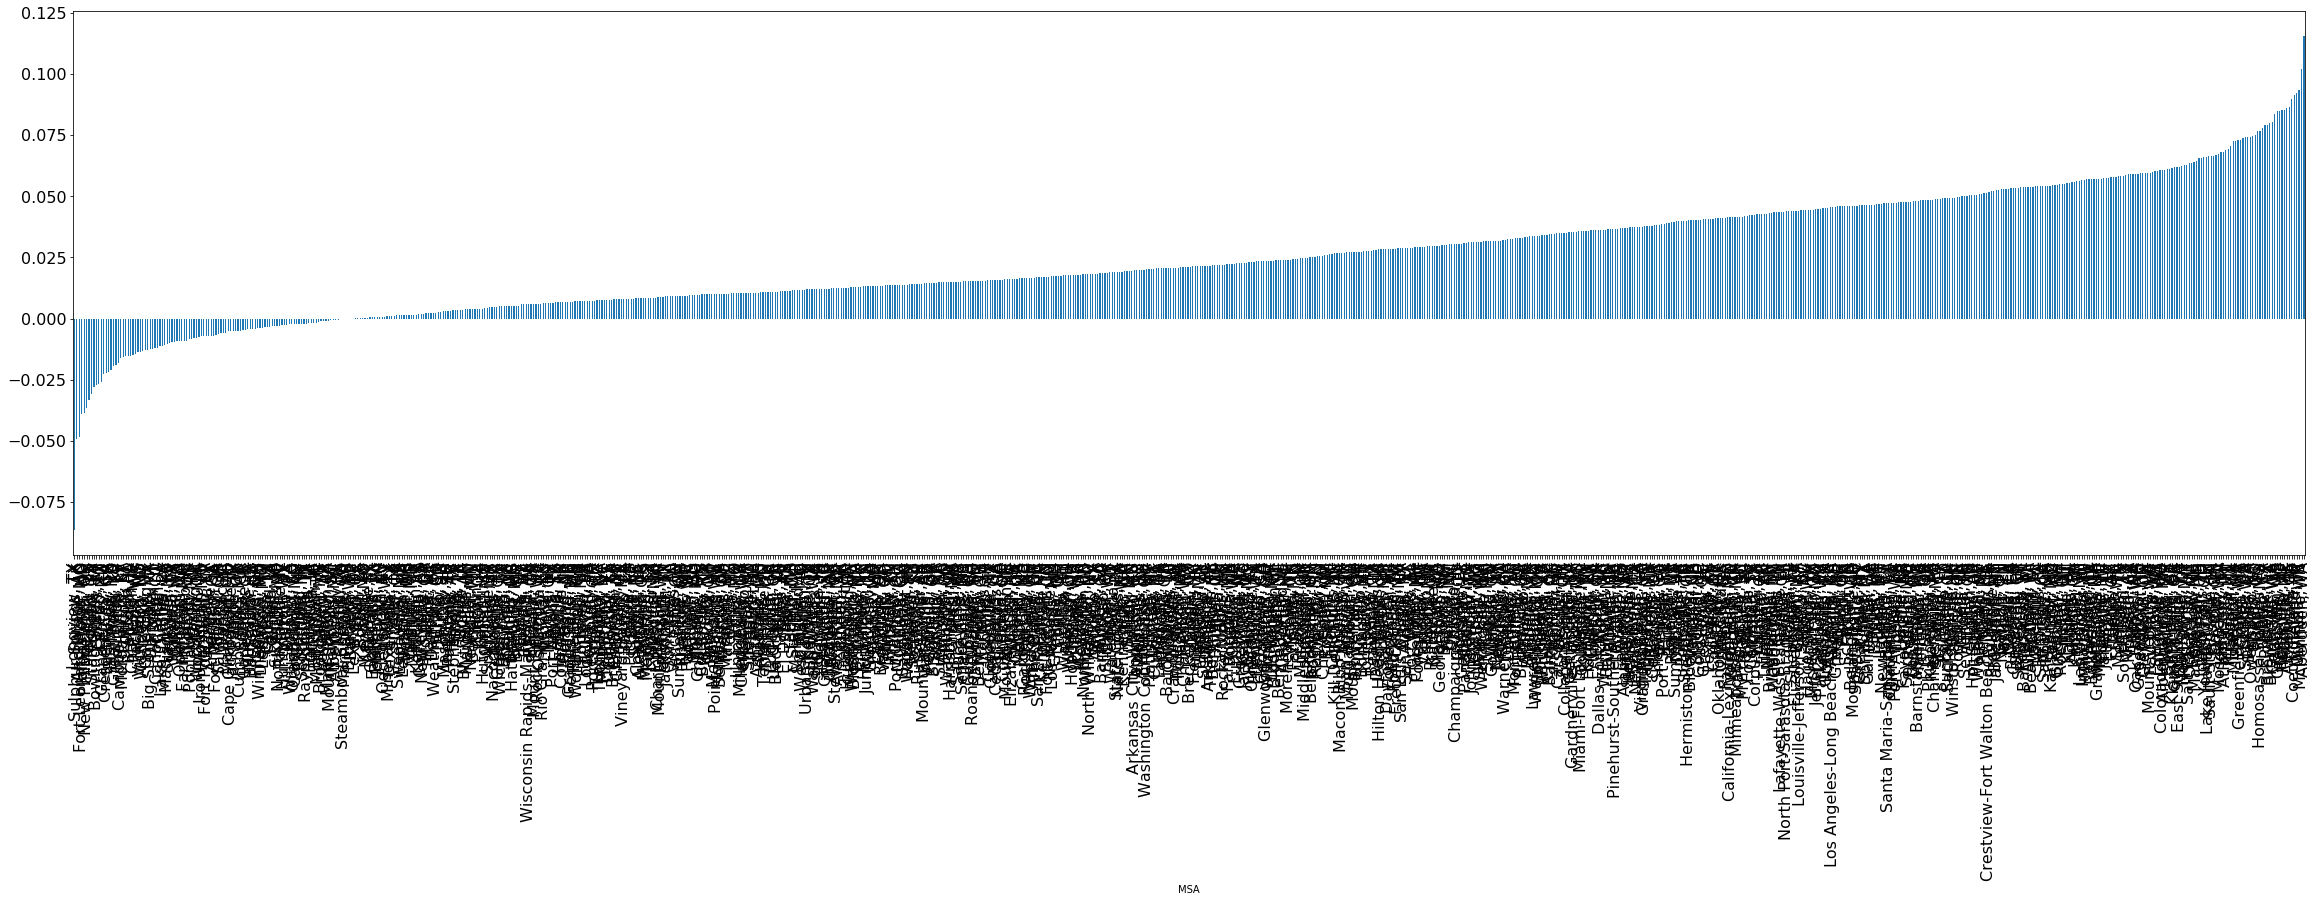

In [10]:
sale_stats_df['% Sale Price Change Since Feb'].sort_values().plot(kind='bar',figsize=(40,10),fontsize=16)

In [25]:

sale_stats_df['Sale Pr CAGR GFC'].sort_values().reset_index().hvplot.bar(figsize=(40,10))

:Bars   [index]   (Sale Pr CAGR GFC)

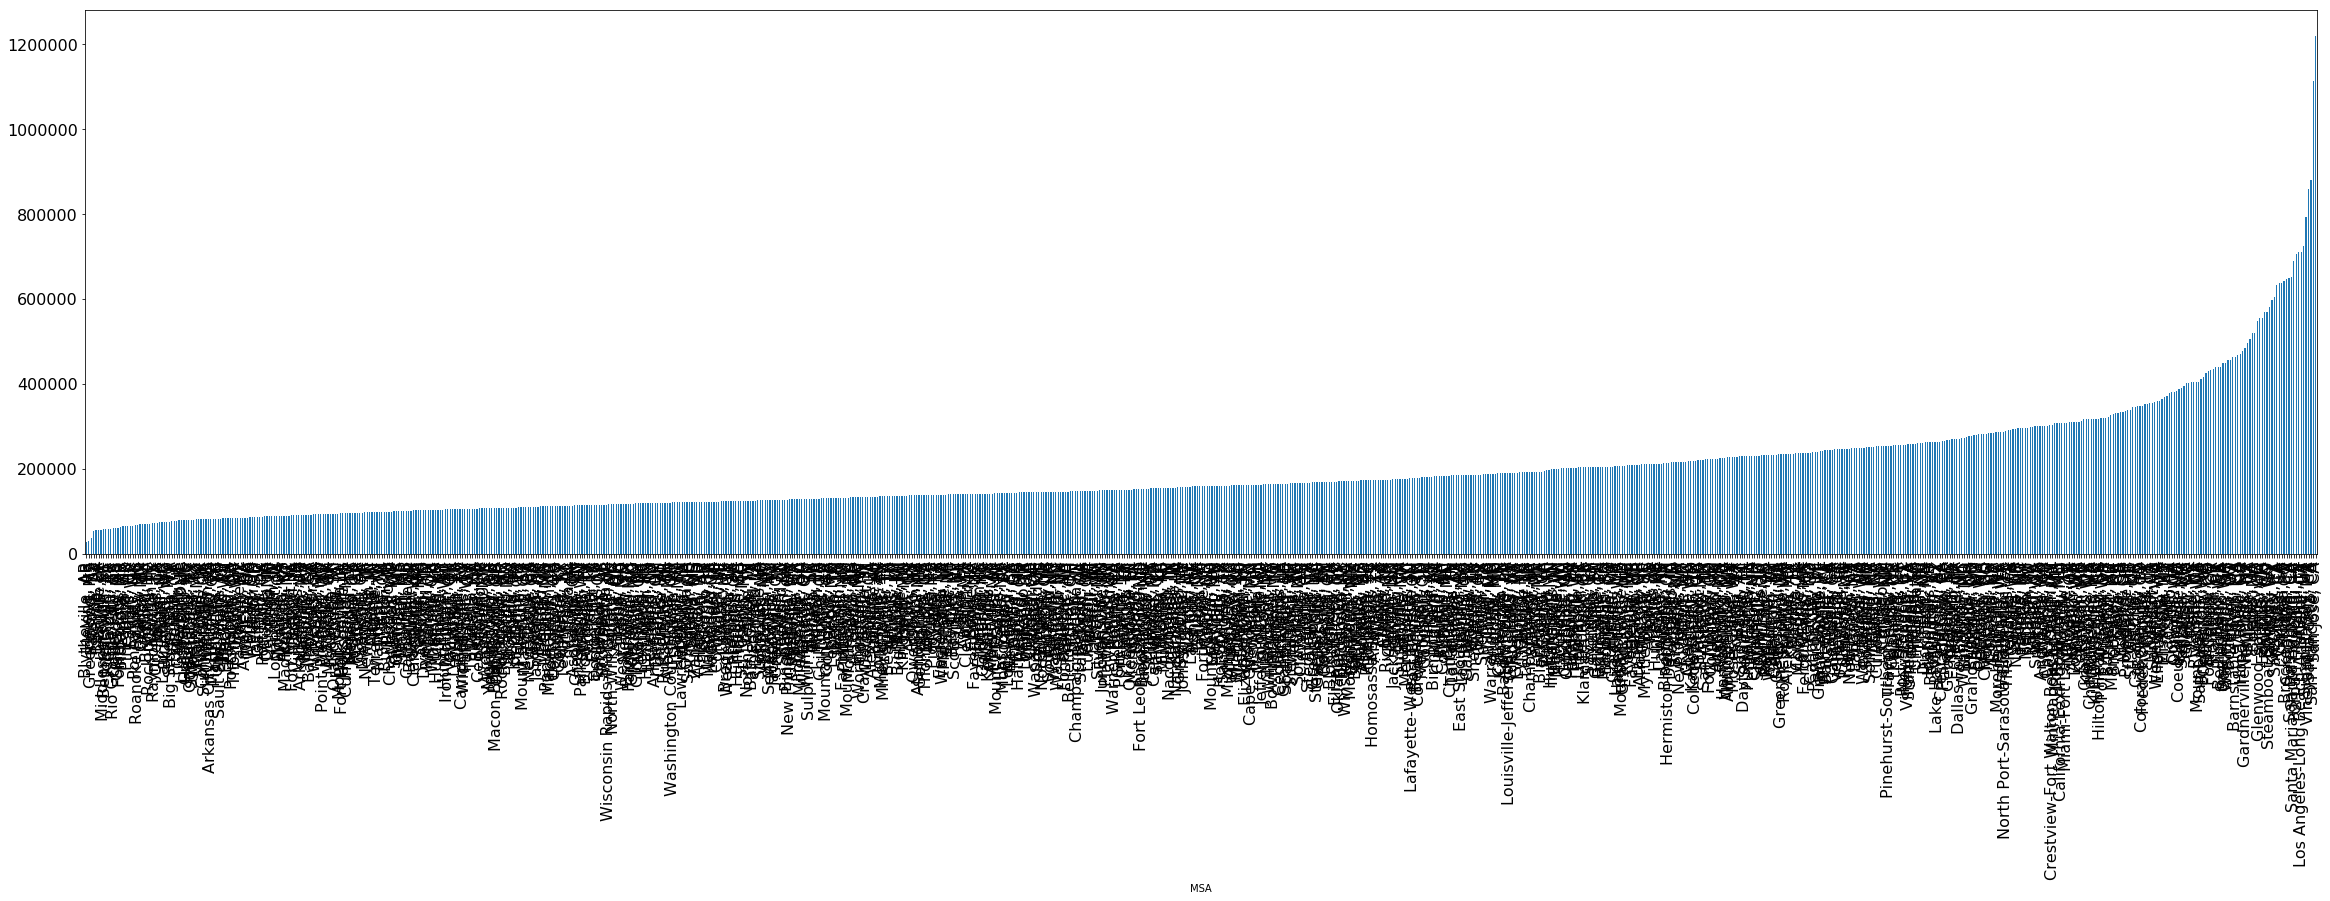

In [12]:
sale_stats_df['Sale Price Last'].sort_values().plot(kind='bar',figsize=(40,10),fontsize=16)